In [25]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [3]:
sns.set(rc={'figure.figsize':(17.7,8.27)})

/Users/roxanne/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (9,10) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


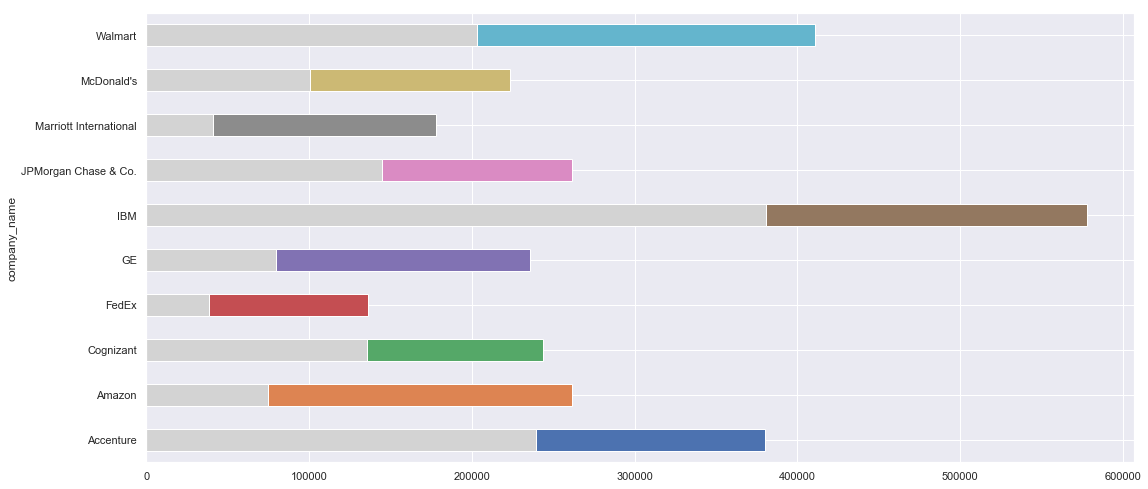

In [4]:
data = pd.read_csv("temp_datalab_records_linkedin_company.csv")
companies_size  = data.groupby('company_name')['employees_on_platform'].max().sort_values(ascending = True)
companies_size_min  = data.groupby('company_name')['employees_on_platform'].min().sort_values(ascending = True)
size_diff = companies_size - companies_size_min
size_diff = size_diff.sort_values()
x = size_diff.index.values[-10:]
max_company = data[data.company_name.isin(x)].groupby('company_name')['employees_on_platform'].max()
min_company = data[data.company_name.isin(x)].groupby('company_name')['employees_on_platform'].min()
max_company.plot(kind="barh", stacked=True)
min_company.plot(kind="barh", stacked=True, color ='lightgray')

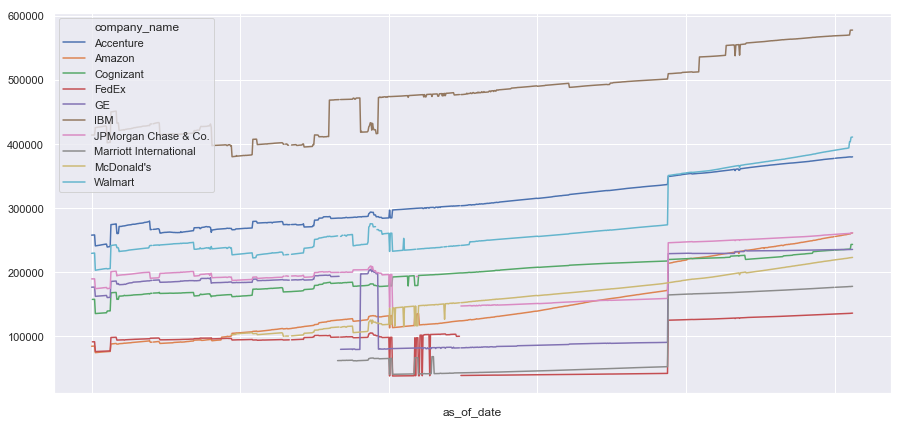

In [13]:
fig, ax = plt.subplots(figsize=(15,7))
data[data.company_name.isin(x)].groupby(['as_of_date','company_name']) \
['employees_on_platform'].max().unstack().plot(ax=ax)

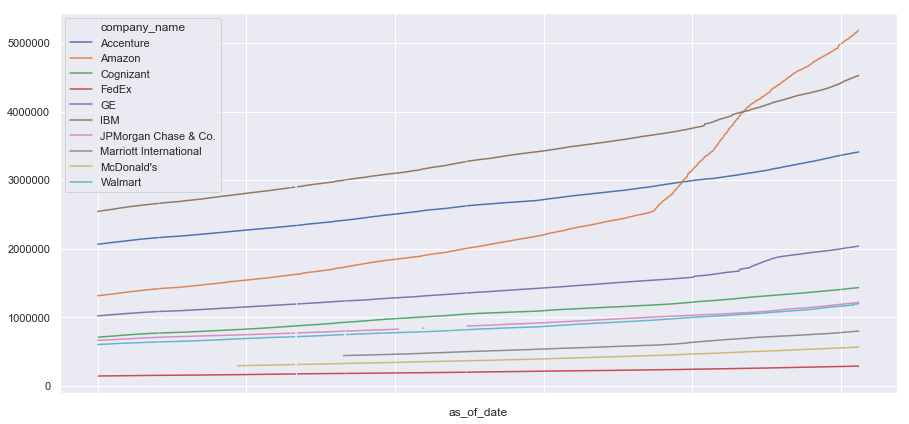

In [17]:
fig, ax = plt.subplots(figsize=(15,7))
data[data.company_name.isin(x)].groupby(['as_of_date','company_name']) \
['followers_count'].max().unstack().plot(ax=ax)

Text(0.5, 1.0, 'Selectiveness of Amazon')

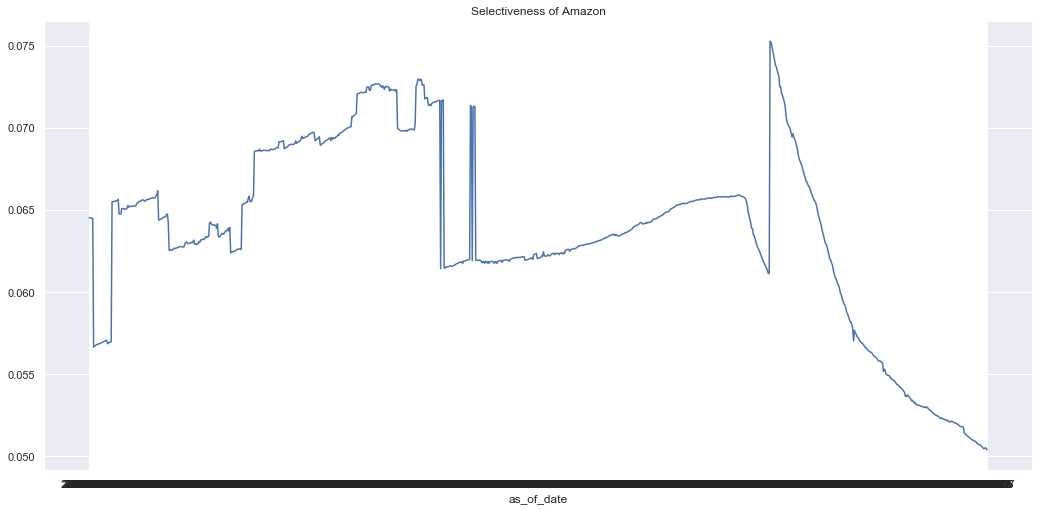

In [24]:
amazon = data[data.company_name=='Amazon']
sns.lineplot(amazon.as_of_date, amazon.employees_on_platform/amazon.followers_count)\
.set_title("Selectiveness of Amazon")

#### Use linear regression to predict the selectiveness in the following year

In [31]:
import datetime as dt
data.as_of_date = pd.to_datetime(data.as_of_date)
data.as_of_date = data.as_of_date.map(dt.datetime.toordinal)

In [39]:
amazon = data[data.company_name=='Amazon']

In [48]:
linreg_e = LinearRegression().fit(X = amazon.as_of_date.values.reshape(-1,1), \
                                y = amazon.employees_on_platform)
linreg_f = LinearRegression().fit(X = amazon.as_of_date.values.reshape(-1,1), \
                                y = amazon.followers_count)

In [49]:
linreg_e.predict(X = 1000000)/linreg_f.predict(X = 1000000)

array([0.05199082])